In [1]:
import os
import pickle
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice
import plotly # v5.4.0

# 0. 개요
- `optuna.study.Study` 객체는 실험 전반에 대한 정보를 담고 있음
- 아래 내용을 소개
    1. `optuna.study.Study` 객체와 이를 이용한 시각화
    2. `Sqlite3`를 이용해 DB에 저장된 실험 정보를 `optuna.study.Study` 객체로 불러오기

# 1. `optuna.study.Study` 객체와 이를 이용한 시각화

In [ ]:
with open('exp/latest/study.pkl', 'rb') as f:
    study = pickle.load(f)

- `values_0` : f1_score
- `values_1` : num_params
- `values_2` : infrenece time

저장된 값 확인

In [240]:
study.trials_dataframe()

,number,values_0,values_1,values_2,datetime_start,datetime_complete,duration,params_batch_size,params_depth_multiple,params_img_size,...,params_m7/v3_hs,params_m7/v3_se,params_m7/v3_t,params_n_select,params_optimizer,params_width_multiple,user_attrs_data_config,user_attrs_hyperparams,user_attrs_model_config,state
0,0,0.188723,485628.0,1.763462,2021-11-26 23:56:07.950037,2021-11-26 23:57:13.495753,0 days 00:01:05.545716,32,0.50,224,...,0.0,0.0,1.0,2,Adam,0.5,"{'DATA_PATH': '/opt/ml/data', 'DATASET': 'TACO...","{'EPOCHS': 1, 'IMG_SIZE': 224, 'n_select': 2, ...","{'input_channel': 3, 'INPUT_SIZE': [224, 224],...",COMPLETE
1,1,0.120018,3113908.0,3.971750,2021-11-26 23:57:13.496398,2021-11-26 23:58:10.394904,0 days 00:00:56.898506,32,1.00,96,...,NaN,NaN,NaN,2,Adam,0.5,"{'DATA_PATH': '/opt/ml/data', 'DATASET': 'TACO...","{'EPOCHS': 1, 'IMG_SIZE': 96, 'n_select': 2, '...","{'input_channel': 3, 'INPUT_SIZE': [96, 96], '...",COMPLETE
2,2,0.143370,89236.0,3.118618,2021-11-26 23:58:10.395554,2021-11-26 23:59:12.335584,0 days 00:01:01.940030,16,0.75,224,...,NaN,NaN,NaN,2,Adam,0.5,"{'DATA_PATH': '/opt/ml/data', 'DATASET': 'TACO...","{'EPOCHS': 1, 'IMG_SIZE': 224, 'n_select': 2, ...","{'input_channel': 3, 'INPUT_SIZE': [224, 224],...",COMPLETE


`target` 인자는 함수를 받음. `t.values[i]`의 `i`에 살펴보고자하는 값의 인덱스 입력. 아래는 각각 f1_score, inference time 예시

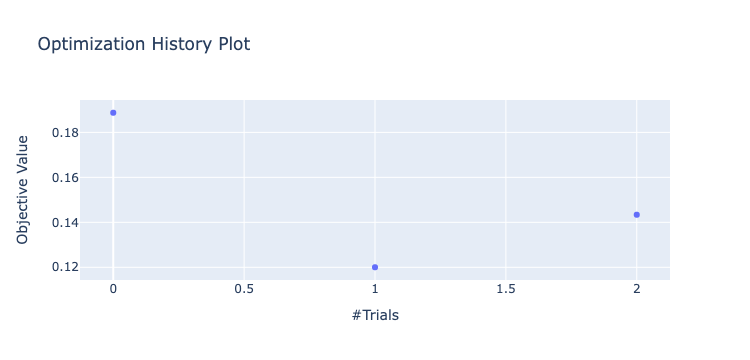

In [17]:
plot_optimization_history(study,target=lambda t: t.values[0])

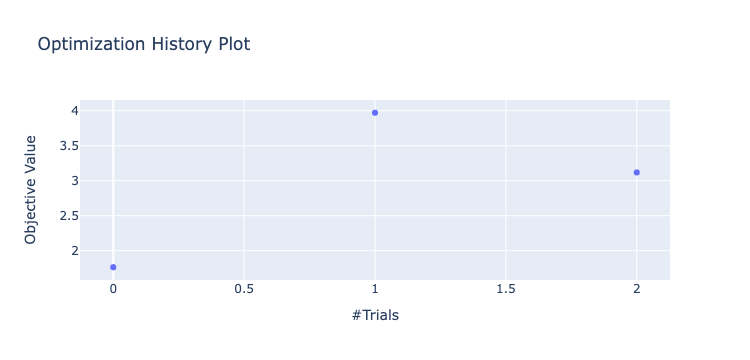

In [18]:
plot_optimization_history(study,target=lambda t: t.values[2])

각 objective value에 영향을 끼치는 요인 파악, `params` 인자로는 `study.params`에서 살펴보고자 하는 인자를 선택

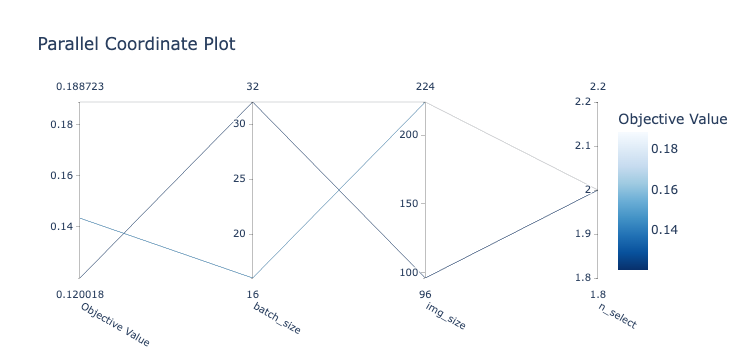

In [15]:
plot_parallel_coordinate(study,target=lambda t: t.values[0], params=["batch_size", "img_size", "n_select"])

# 2. `Sqlite`를 이용해 DB에 저장된 실험 정보를 `optuna.study.Study` 객체로 불러오기

- `sqlite`를 사용해 DB형태로 실험을 저장할 경우 실험 resume이 용이함
- 아래는 `sqlite` DB파일을 study 객체로 불러오는 예시

In [27]:
# tune.py와 동일하게 study 객체를 만들고 불러옴
study_name = "automl101"
storage_name = "sqlite:///exp.db"
sampler = optuna.samplers.MOTPESampler()
rdb_storage = optuna.storages.RDBStorage(url=storage_name)
study_new = optuna.create_study(
                                directions=["maximize", "minimize", "minimize"],                  
                                study_name=study_name,
                                storage=rdb_storage,
                                sampler=sampler,
                                load_if_exists=True)
df_new = study_new.trials_dataframe()

/opt/conda/envs/lightweight/lib/python3.7/site-packages/ipykernel_launcher.py:1: ExperimentalWarning:

MOTPESampler is experimental (supported from v2.4.0). The interface can change in the future.

[I 2021-11-27 12:54:26,703] Using an existing study with name 'automl101' instead of creating a new one.


In [28]:
study_new.trials_dataframe()

,number,values_0,values_1,values_2,datetime_start,datetime_complete,duration,params_batch_size,params_depth_multiple,params_img_size,...,params_m7/v3_hs,params_m7/v3_se,params_m7/v3_t,params_n_select,params_optimizer,params_width_multiple,user_attrs_data_config,user_attrs_hyperparams,user_attrs_model_config,state
0,0,0.158655,426236.0,3.750775,2021-11-27 12:52:09.456535,2021-11-27 12:53:13.534402,0 days 00:01:04.077867,16,1.00,168,...,1,1,3.8,4,SGD,0.50,"{'DATA_PATH': '/opt/ml/data', 'DATASET': 'TACO...","{'EPOCHS': 1, 'IMG_SIZE': 168, 'n_select': 4, ...","{'input_channel': 3, 'INPUT_SIZE': [168, 168],...",COMPLETE
1,1,0.137393,40852.0,1.350586,2021-11-27 12:53:13.554686,2021-11-27 12:54:11.141084,0 days 00:00:57.586398,16,0.25,112,...,0,0,3.6,6,SGD,0.75,"{'DATA_PATH': '/opt/ml/data', 'DATASET': 'TACO...","{'EPOCHS': 1, 'IMG_SIZE': 112, 'n_select': 6, ...","{'input_channel': 3, 'INPUT_SIZE': [112, 112],...",COMPLETE


# 3. [option]`MySQL`을 사용해 DB 서버에서 불러오기

- 외부 DB 서버에서 실험을 관리할 경우

In [22]:
import optuna
import pymysql
pymysql.install_as_MySQLdb()

In [29]:
user_id = 'eliza'
pwd = 'pwd'
ip = '52.78.152.44'
port = '53177'
table_name = 'exp01'
storage_name = f'mysql+mysqldb://{user_id}:{pwd}@{i}:{port}/{table_name}'
study_ = optuna.create_study(study_name='exp01', storage=storage_name, load_if_exists=True)
df = study_.trials_dataframe()

[I 2021-11-27 04:40:30,864] Using an existing study with name 'exp01' instead of creating a new one.
